In [ ]:
from google.colab import drive
drive.mount('/content/drive')

model_path = "/content/drive/MyDrive/nhandangmau/weight/mobilenetv2_test.pth"

import torch
from torchvision.models import mobilenet_v2, MobileNet_V2_Weights
import torch.nn as nn

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
weights = MobileNet_V2_Weights.IMAGENET1K_V1
mobilenet = mobilenet_v2(weights=weights)

num_classes = 43
mobilenet.classifier = nn.Sequential(nn.Dropout(0.3), nn.Linear(1280, num_classes))
mobilenet.to(device)

mobilenet.load_state_dict(torch.load(model_path, map_location=device))
mobilenet.eval()
print(" Model loaded from Drive")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
 Model loaded from Drive


In [ ]:
from google.colab import files
from PIL import Image
from torchvision import transforms

uploaded = files.upload()

for fn in uploaded.keys():
    img_path = fn
    print("Uploaded file:", img_path)

weights = MobileNet_V2_Weights.IMAGENET1K_V1
base_tf = weights.transforms()
tf = transforms.Compose([
    transforms.Resize((224,224)),
    base_tf
])
img = Image.open(img_path).convert("RGB")
x = tf(img).unsqueeze(0).to(device)

with torch.no_grad():
    out = mobilenet(x)
    pred_class = out.argmax(1).item()

print(" Predicted class ID:", pred_class)


Saving 1_24.PNG to 1_24.PNG
Uploaded file: 1_24.PNG
 Predicted class ID: 24


In [ ]:
!pip install ultralytics --upgrade


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 28.5 MB/s eta 0:00:00


Saving 34.PNG to 34.PNG

0: 224x192 1 35, 11.2ms
Speed: 1.4ms preprocess, 11.2ms inference, 1.9ms postprocess per image at shape (1, 3, 224, 192)
Detected 1 objects
Object 1: Predicted class ID = 35


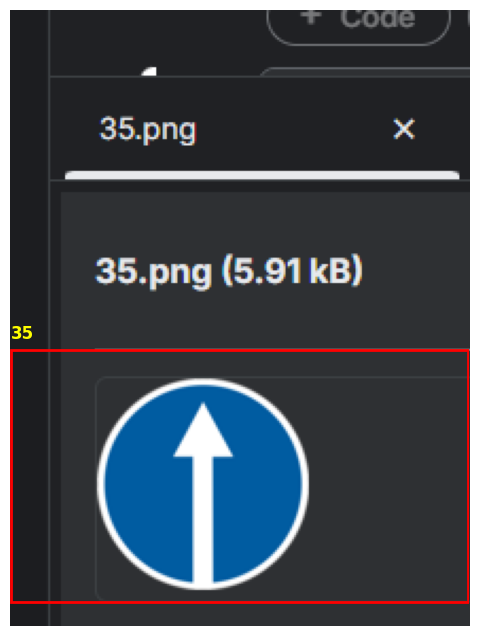

In [ ]:
for fn in uploaded.keys():
    img_path = fn
    img = Image.open(img_path).convert("RGB")

    results = yolo_model(img)
    boxes = results[0].boxes.xyxy.cpu().numpy()
    print(f"Detected {len(boxes)} objects")

    for i, box in enumerate(boxes):
        xmin, ymin, xmax, ymax = [int(b) for b in box]
        crop = img.crop((xmin, ymin, xmax, ymax))
        x = tf_mobilenet(crop).unsqueeze(0).to(device)

        with torch.no_grad():
            out = mobilenet(x)
            pred_class = out.argmax(1).item()
        print(f"Object {i+1}: Predicted class ID = {pred_class}")


fig, ax = plt.subplots(1, figsize=(10,8))
ax.imshow(img)


class_names = {0:"Speed Limit 20", 1:"Speed Limit 30", 10:"No Entry"}
for i, box in enumerate(boxes):
    xmin, ymin, xmax, ymax = [int(b) for b in box]
    width, height = xmax-xmin, ymax-ymin
    rect = patches.Rectangle((xmin, ymin), width, height, linewidth=2, edgecolor='r', facecolor='none')
    ax.add_patch(rect)


    pred_class_name = class_names.get(pred_class, str(pred_class))
    ax.text(xmin, ymin-5, pred_class_name, color='yellow', fontsize=12, weight='bold')

plt.axis('off')
plt.show()
